# Python WRDS Data Access and Manipulation, Visualizations + intro to PCA
<p><a name="sections"></a></p>



<p><a name="sections"></a></p>


## Sections

- <a href="#CRSP">CRSP</a><br>
- <a href="#Djones">DJones</a><br>
- <a href="#IBES">IBES</a><br>
- <a href="#Ktmine">Ktmine</a><br>
- <a href="#ThomsonReuters">trws</a><br>
- <a href="#SEC_Filings">WRDS_SEC</a><br>
- <a href="#pca-sklearn">PCA in Scikit Learn</a><br>

In [1]:
#This is a Jupyter Notebook, To run a cell hit CTRL+Enter

In [39]:
#Import Libraries

from __future__ import division
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
from pandas.tseries.offsets import MonthEnd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.rc('figure', figsize=(14, 8))

import wrds

In [3]:
if __name__ == "__main__":
    
    # Connect to WRDS, prompts for username and password in console 
    db = wrds.Connection()
    
    #The wrds module supports many different methods of accessing WRDS data
    
        # db.describe_table()
        # db.get_table()
        # db.list_tables()
        # db.engine()
        # db.insp()
        # db.raw_sql()
        # db.get_row_count()
        # db.list_libraries()
        # db.schema_perm()
        #for more information you can use the help function, e.g. help(db.list_libraries)
    
    # Pulls list of all libraries in WRDS
    data_libs = db.list_libraries()
    
    #Pulls list of all tables in the CRSP library
    data_crsp = db.list_tables(library='crsp')
    
    # Pulls list of all tables in the wrdssec library
    data_wrdssec = db.list_tables(library='wrdssec')
    
    # WRDS Forms
    data_wrds_forms = db.describe_table(library="wrdssec", table = "wrds_forms")
    
    #WRDS SEC Readability and Sentiment Analysis
    data_wrds_nlpsa = db.describe_table(library="wrdssec", table = "wrds_nlpsa")

Enter your WRDS username [axjx]:wawang
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done
Approximately 22279400 rows in wrdssec.wrds_forms.
Approximately 45827200 rows in wrdssec.wrds_nlpsa.


In [4]:
#We will give a brief overview of the following libraries:

#crsp 
#djones
#ibes
#ktmine
#trws
#wrdsapps
#wrdssec

<p><a name="CRSP"></a></p>
## CRSP



The CRSP U.S. Stock database contains end-of-day and month-end prices on primary listings for the NYSE, NYSE MKT, NASDAQ, and Arca exchanges, along with basic market indices. 

https://wrds-web.wharton.upenn.edu/wrds/support/Data/_001Manuals%20and%20Overviews/_002CRSP/_001General/_009WRDS%20Overview%20of%20CRSP%20U.S.%20Stock%20Database.cfm

In [5]:
#There are 291 data tables within the CRSP Library
print(len(data_crsp)) 

291


In [6]:
#Let's take a look at the stocknames table
db.describe_table(library='crsp', table='stocknames')
stocknames = db.get_table(library='crsp', table='stocknames', obs=10)
stocknames.head()

Approximately 59628 rows in crsp.stocknames.


,permno,permco,namedt,nameenddt,cusip,ncusip,ticker,comnam,hexcd,exchcd,siccd,shrcd,shrcls,st_date,end_date,namedum
0,10000.0,7952.0,1986-01-07,1987-06-11,68391610,68391610,OMFGA,OPTIMUM MANUFACTURING INC,3.0,3.0,3990.0,10.0,A,1986-01-31,1987-06-30,2.0
1,10001.0,7953.0,1986-01-09,1993-11-21,36720410,39040610,GFGC,GREAT FALLS GAS CO,2.0,3.0,4920.0,11.0,None,1986-01-31,2017-08-31,2.0
2,10001.0,7953.0,1993-11-22,2008-02-04,36720410,29274A10,EWST,ENERGY WEST INC,2.0,3.0,4920.0,11.0,None,1986-01-31,2017-08-31,2.0
3,10001.0,7953.0,2008-02-05,2009-08-03,36720410,29274A20,EWST,ENERGY WEST INC,2.0,3.0,4920.0,11.0,None,1986-01-31,2017-08-31,2.0
4,10001.0,7953.0,2009-08-04,2009-12-17,36720410,29269V10,EGAS,ENERGY INC,2.0,3.0,4920.0,11.0,None,1986-01-31,2017-08-31,2.0


In [7]:
#Let's look at Pricing data
db.describe_table(library='crsp', table='dsf')
dsf_crsp = db.get_table(library='crsp', table='dsf', obs=100000)

Approximately 92380400 rows in crsp.dsf.


In [8]:
dsf_crsp.tail()

,cusip,permno,permco,issuno,hexcd,hsiccd,date,bidlo,askhi,prc,vol,ret,bid,ask,shrout,cfacpr,cfacshr,openprc,numtrd,retx
99995,43787510,88736.0,7791.0,70028800.0,3.0,6020.0,1991-08-07,6.125,6.125,6.125,3000.0,0.020833,6.00,7.0,1778.0,1.0,1.0,NaN,1.0,0.020833
99996,43787510,88736.0,7791.0,70028800.0,3.0,6020.0,1991-08-08,6.125,6.125,6.125,3000.0,0.000000,6.25,7.0,1778.0,1.0,1.0,NaN,1.0,0.000000
99997,43787510,88736.0,7791.0,70028800.0,3.0,6020.0,1991-08-09,6.125,6.125,6.125,3000.0,0.000000,6.25,7.0,1778.0,1.0,1.0,NaN,1.0,0.000000
99998,43787510,88736.0,7791.0,70028800.0,3.0,6020.0,1991-08-12,6.125,6.750,6.500,4000.0,0.061224,6.25,7.0,1778.0,1.0,1.0,NaN,3.0,0.061224
99999,43787510,88736.0,7791.0,70028800.0,3.0,6020.0,1991-08-13,6.125,7.000,7.000,30130.0,0.076923,6.50,7.5,1778.0,1.0,1.0,NaN,7.0,0.076923


<p><a name="Djones"></a></p>
## DowJones

Plotting

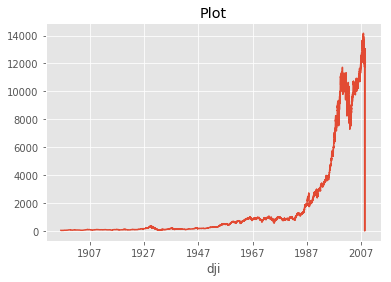

In [9]:
data = db.get_table("djones", "djdaily", columns=['date','dji'], date_cols=['date'], index_col=['date'])
plt.plot(data)
plt.xlabel('date')
plt.xlabel('dji')
plt.title('Plot')
plt.show()

<p><a name="IBES"></a></p>
## IBES

In [10]:
#TBD

## KTMINE
<p><a name="Ktmine"></a></p>

In [11]:
#TBD

## TRWS
<p><a name="ThomsonReuters"></a></p>

In [12]:
#TBD


<p><a name="SEC_Filings"></a></p>
## WRDSSEC


In [13]:
#There are 21 available data tables
print(len(data_wrdssec))

21


In [14]:
#wciklink_names #wrds_forms #wrds_nlpsa

In [15]:
#Number of rows in each table - we can ignore table with 0 entries.
for i in data_wrdssec:
    print(i, db.get_row_count(library='wrdssec', table=i))

_forms_ 614
_names_ 595848
_qvards_ 0
_regtypes_ 7
chars 0
dforms 17725700
exhibits 68240300
fforms 17314400
forms 17688000
items8k 3066160
items8k_list 0
missing_forms 21268
wciklink_cusip 59886
wciklink_gvkey 51764
wciklink_names 680718
wrds_13f_holdings 30393800
wrds_13f_link 4826
wrds_13f_summary 146471
wrds_forms 22279400
wrds_forms_reg 17897100
wrds_nlpsa 45827200


In [16]:
#Question: How many 10K's have been filed by AAPL?
#Answer: AAPL had one cik, two conames, and 27 total number of 10Ks filed from 1994-Jan to 2018-Mar.

tickerh =  'AAPL'
sql_stmt = "select * from wrdssec.wciklink_names where tickerh = '%s' ;" % (tickerh,)
wrds_forms = db.raw_sql(sql_stmt)
AAPL_wrdsForms = pd.DataFrame(wrds_forms)
AAPL_wrdsForms 

,cik,coname,fndate,lndate,n10k,n10k_nt,n10k_a,n10q,n10q_nt,n10q_a,ndef,n8k,nlet,n13d,n13g,n13f,ntot,ntot_nt,ntot_a,header,gvkey,cusiph,tickerh
0,0000320193,APPLE COMPUTER INC,1994-01-26,2007-01-04,15.0,1.0,1.0,40.0,1.0,1.0,14.0,50.0,2.0,14.0,71.0,0.0,767.0,2.0,67.0,0.0,001690,03783310,AAPL
1,0000320193,APPLE INC,2007-01-10,2018-03-07,12.0,0.0,1.0,35.0,0.0,1.0,27.0,112.0,25.0,0.0,30.0,0.0,1867.0,0.0,34.0,1.0,001690,03783310,AAPL


In [17]:
#Look at specific filings, e.g. 10Qs
cik =  '0000320193'
sql_stmt = "select * from wrdssec.wrds_forms where cik = '%s' ;" % (cik,)
wrds_forms = db.raw_sql(sql_stmt)
AAPL_wrdsForms = pd.DataFrame(wrds_forms)
#Most recent 5 10Q filings
AAPL_wrdsForms[AAPL_wrdsForms.form == '10-Q'].tail(5)

,fdate,cik,findexdate,lindexdate,form,coname,wrdsfname,fsize,doccount,fname,rdate,secadate,secatime,secpdate,accession,regcount
2303,2016-07-27,0000320193,2016-07-27,2016-07-28,10-Q,APPLE INC,000032/320193/0001628280-16-017809.txt,9797615.0,72.0,edgar/data/320193/0001628280-16-017809.txt,2016-06-25,2016-07-27,59556.0,2016-07-27,0001628280-16-017809,1.0
2418,2017-02-01,0000320193,2017-02-01,2017-02-13,10-Q,APPLE INC,000032/320193/0001628280-17-000717.txt,8206325.0,72.0,edgar/data/320193/0001628280-17-000717.txt,2016-12-31,2017-02-01,59609.0,2017-02-01,0001628280-17-000717,1.0
2510,2017-05-03,0000320193,2017-05-03,2017-05-03,10-Q,APPLE INC,000032/320193/0001628280-17-004790.txt,9684229.0,72.0,edgar/data/320193/0001628280-17-004790.txt,2017-04-01,2017-05-03,59543.0,2017-05-03,0001628280-17-004790,1.0
2560,2017-08-02,0000320193,2017-08-02,2017-08-02,10-Q,APPLE INC,000032/320193/0000320193-17-000009.txt,10155269.0,72.0,edgar/data/320193/0000320193-17-000009.txt,2017-07-01,2017-08-02,59488.0,2017-08-02,0000320193-17-000009,1.0
2615,2018-02-02,0000320193,2018-02-02,2018-02-05,10-Q,APPLE INC,000032/320193/0000320193-18-000007.txt,8606471.0,73.0,edgar/data/320193/0000320193-18-000007.txt,2017-12-30,2018-02-02,28886.0,2018-02-02,0000320193-18-000007,1.0


In [18]:
AAPL_wrdsForms[AAPL_wrdsForms.form == '10-Q'].shape

(72, 16)

In [19]:
cikNum =  '0000320193'
sql_stmt = "select * from wrdssec.wrds_nlpsa where cik = '%s' order by fdate;" % (cikNum,)
wrds_forms_nlpsa = db.raw_sql(sql_stmt)

In [20]:
#Sentiment scores on Apple's 8K filings
wrdsFormsDF_8K = wrds_forms_nlpsa[wrds_forms_nlpsa.form == '8-K']

In [21]:
#Sentiment scores on Apple's 10Q filings
wrdsFormsDF_10Q = wrds_forms_nlpsa[wrds_forms_nlpsa.form == '10-Q']

In [22]:
wrds_forms_nlpsa.form.unique()

array(['10-Q', '424B5', 'SC 13G/A', 'SC 13G', 'S-8', 'DEF 14A', '10-K',
       'SC 13D/A', '8-K', 'S-3', 'S-3/A', '8-K/A', '424B3', 'DEFA14A',
       'SC 13D', 'NSAR-B', '10-Q/A', 'PRE 14A', 'S-4', 'S-4/A', '10-K/A',
       '10-K405', 'NO ACT', 'SC TO-I', '4', 'SC TO-I/A', '3', '4/A',
       'DEFR14A', 'NT 10-Q', 'CORRESP', 'UPLOAD', 'NT 10-K', 'PX14A6G',
       'S-3ASR', '424B2', 'FWP', 'DFAN14A', 'SD', '8-A12B'], dtype=object)

In [23]:
for i in list(wrds_forms_nlpsa.form.unique()):
    if wrds_forms_nlpsa[wrds_forms_nlpsa.form == i].shape[0] > 10: 
        print(i, wrds_forms_nlpsa[wrds_forms_nlpsa.form == i].shape)


10-Q (185, 50)
SC 13G/A (421, 50)
SC 13G (22, 50)
S-8 (27, 50)
DEF 14A (24, 50)
10-K (22, 50)
8-K (488, 50)
DEFA14A (13, 50)
4 (1290, 50)
3 (33, 50)
CORRESP (18, 50)
UPLOAD (27, 50)
PX14A6G (118, 50)
424B2 (350, 50)
FWP (174, 50)


In [24]:
wrdsFormsDF_10Q.finterms_positive_count.describe()

count    185.000000
mean     144.232432
std       33.934640
min       38.000000
25%      141.000000
50%      146.000000
75%      161.000000
max      254.000000
Name: finterms_positive_count, dtype: float64

In [25]:
#wrdsFormsDF_10Q

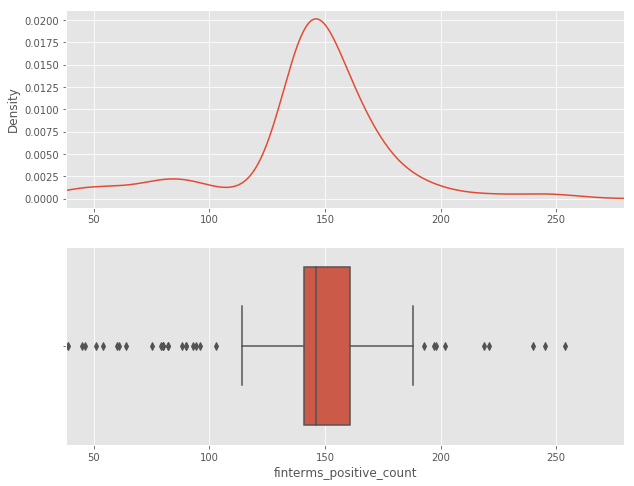

In [27]:
#Let's visualize the distribution of the count of positive LM finance words using a density and boxplot
i = 'finterms_positive_count'
df = wrdsFormsDF_10Q
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

In [53]:
#2005's 10Q below had the highest count of finterms which were positive!
max_pos = wrdsFormsDF_10Q['finterms_positive_count'].max()
wrdsFormsDF_10Q[wrdsFormsDF_10Q['finterms_positive_count'] == max_pos]

,gvkey,cik,fdate,form,coname,secfname,fname,fsize,rundate,filename,flesch_reading_ease,flesch_kincaid_grade_level,rix,coleman_liau_index,gunning_fog_index,ari,smog_index,lix,paragraphcount,charcount_raw,averagewordspersentence,charcounttokens_raw,charcount,wordcount,syllablecount,complexwordcount,sentencecount,averagewordsperparagraph,charcounttokens,finterms_negative,finterms_modalweak_count,finterms_modalstrong_count,finterms_positive,harvardiv_negative,finterms_litigious_count,finterms_uncertainty_count,finterms_modalweak,finterms_litigious,lm_master_dictionary,finterms_uncertainty,lm_master_dictionary_count,harvardiv_negative_count,finterms_negative_count,finterms_modalstrong,finterms_positive_count,analysistime,readabilitytime,sentimenttime,findexdate,lindexdate
299,001690,0000320193,2005-05-04,10-Q,APPLE COMPUTER INC,edgar/data/320193/0001104659-05-020421.txt,000032/320193/0001104659-05-020421.txt,1710743.0,2005-12-31,000032/320193/0001104659-05-020421.txt,26.045676,16.735635,9.52785,21.46668,21.003033,23.558209,18.066361,61.911438,568.0,287354.0,28.61658,236581.0,287805.0,44184.0,79251.0,10556.0,1544.0,77.119718,233581.0,0.024084,307.0,107.0,0.006211,0.04252,941.0,595.0,0.007506,0.023008,1.0,0.014548,40898.0,1739.0,985.0,0.002616,254.0,2.570993,2.158279,0.36975,2005-05-04,2005-06-30


In [28]:
df = wrdsFormsDF_10Q[['flesch_kincaid_grade_level', 'gunning_fog_index', 'finterms_litigious_count', 'finterms_uncertainty_count',
       'finterms_modalweak', 'finterms_litigious', 'lm_master_dictionary',
       'finterms_uncertainty', 'lm_master_dictionary_count',
       'harvardiv_negative_count', 'finterms_negative_count',
       'finterms_modalstrong', 'finterms_positive_count', 'analysistime',
       'readabilitytime', 'sentimenttime']]

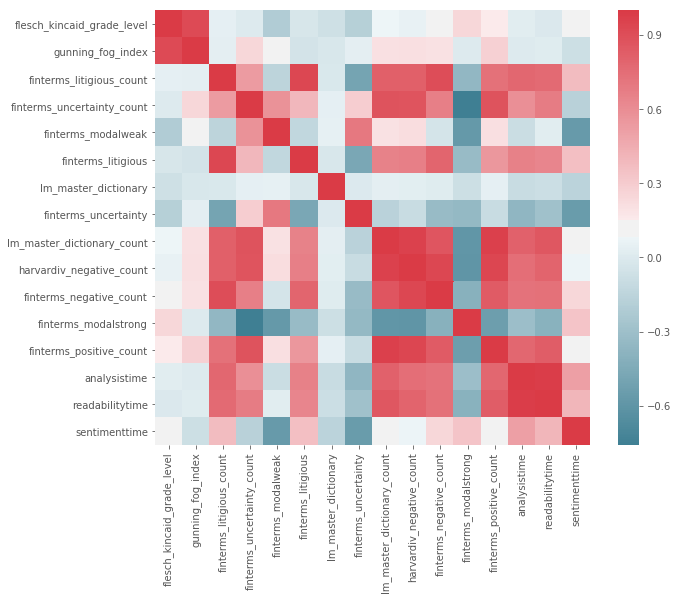

In [29]:
f, ax = plt.subplots(figsize=(10, 8))
df = df

corr =  df.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [30]:
df = wrdsFormsDF_8K[['flesch_kincaid_grade_level', 'gunning_fog_index', 'finterms_litigious_count', 'finterms_uncertainty_count',
       'finterms_modalweak', 'finterms_litigious', 'lm_master_dictionary',
       'finterms_uncertainty', 'lm_master_dictionary_count',
       'harvardiv_negative_count', 'finterms_negative_count',
       'finterms_modalstrong', 'finterms_positive_count', 'analysistime',
       'readabilitytime', 'sentimenttime']]

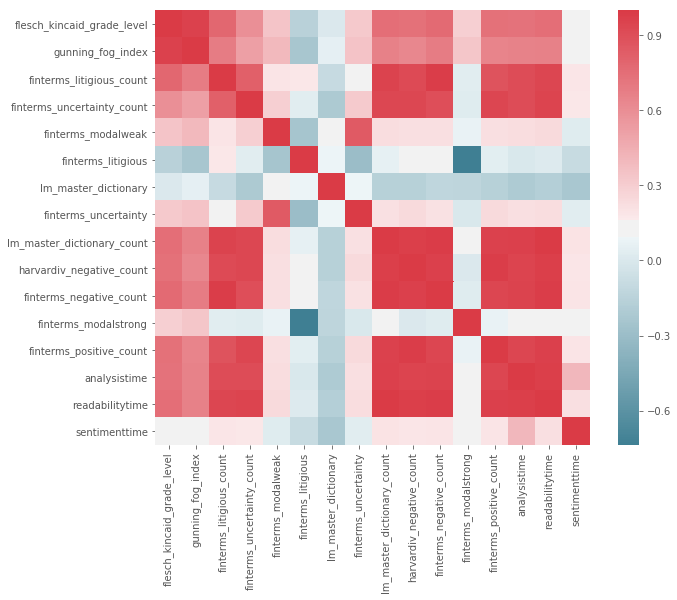

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
df = df

#subsetting non-date columns..
corr =  df.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Text(450.629,0.5,'gunning_fog_index')

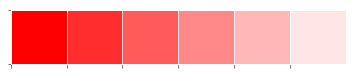

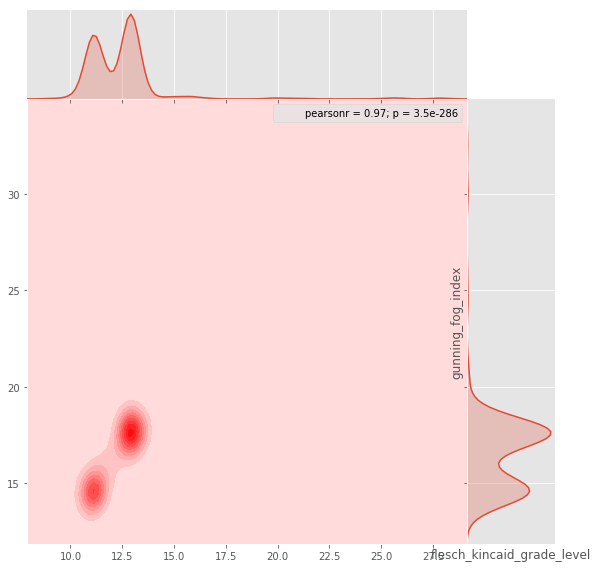

In [32]:
flesch_kincaid_grade_level_array = df['flesch_kincaid_grade_level'].values
gunning_fog_index_array = df['gunning_fog_index'].values 

sns.palplot(sns.light_palette("red", reverse=True))
pal = sns.light_palette("red", as_cmap=True)
sns.jointplot(flesch_kincaid_grade_level_array,gunning_fog_index_array,kind='kde',size=8,space=0,cmap=pal)
plt.xlabel('flesch_kincaid_grade_level')
plt.ylabel('gunning_fog_index')

<p><a name="pca-sklearn"></a></p>
## PCA: A statisical approach to Identifying Factors

In [33]:
start = datetime.datetime(1963, 1, 1)
end = datetime.datetime(2015, 12, 30)
ds = web.DataReader("30_Industry_Portfolios", "famafrench", start, end)
tb = pd.DataFrame(ds[0])
tb = tb.replace(-99.99, np.nan)
tb = tb.dropna()
tb.index = tb.index.to_timestamp('M')
tb.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1963-01-31,6.64,4.03,1.72,8.69,6.55,5.46,6.45,5.65,4.46,8.82,4.56,7.93,7.64,4.97,6.21,1.20,10.66,8.25,2.58,5.26,4.13,1.36,6.14,8.23,5.99,3.57,4.09,7.53,3.63,8.64
1963-02-28,-2.73,-5.05,-3.36,-6.65,-1.94,-3.25,-3.18,-2.58,-3.85,0.65,-0.71,-2.13,-2.60,-6.36,-2.93,-0.96,-1.76,-0.44,-1.33,-1.47,-1.09,0.06,-4.11,-2.17,0.29,-1.87,-0.52,-3.74,-0.35,0.30
1963-03-31,1.73,4.61,7.74,1.12,-0.87,4.00,1.42,1.18,3.65,0.83,3.44,2.24,2.90,1.39,6.82,0.23,2.73,6.20,6.99,1.79,1.94,3.90,3.70,3.01,3.31,0.60,2.17,-5.72,2.30,5.29
1963-04-30,1.10,0.66,6.30,-0.80,7.95,6.02,1.60,7.62,4.44,7.69,4.01,5.45,3.38,5.88,5.98,3.37,4.89,4.34,6.08,2.40,3.73,2.43,6.78,4.86,8.52,5.64,5.51,0.48,3.65,6.11
1963-05-31,3.49,1.20,-3.00,4.43,0.55,0.91,0.49,-0.25,1.28,2.44,1.18,6.56,6.08,4.68,7.15,-0.90,2.29,3.90,-0.19,1.03,-0.64,3.53,3.85,-1.13,6.56,1.09,2.68,3.12,0.42,-0.03


In [34]:
X_std = StandardScaler().fit_transform(tb)
pca = PCA(n_components=3)
Y = pca.fit_transform(X_std)
print('Variance percent explained\n', pca.explained_variance_ratio_)

Variance percent explained
 [0.62866051 0.05695933 0.04621142]


In [35]:
df_pca = pd.DataFrame(Y*(-1),
                     columns=['PCA1', 'PCA2','PCA3'])
df_pca.index = tb.index
df_pca.head()

,PCA1,PCA2,PCA3
Date,,,
1963-01-31,4.294556,0.128508,-0.293262
1963-02-28,-2.985444,0.667855,0.424322
1963-03-31,1.408040,0.349679,-1.053309
1963-04-30,3.277710,0.187116,-0.277771
1963-05-31,0.930890,0.787184,0.765141


In [36]:
start = datetime.datetime(1963, 1, 1)
end = datetime.datetime(2011, 12, 30)
ds = web.DataReader("F-F_Research_Data_Factors", "famafrench", start, end)
ff = pd.DataFrame(ds[0])
ff.index = ff.index.to_timestamp('M')
ff['mktret']=ff['Mkt-RF']+ff['RF']
ff = ff.rename(columns={'Mkt-RF': 'mktrf'})
ff = ff/100
ff.index = ff.index + MonthEnd(0)
ff.head(3)

,mktrf,SMB,HML,RF,mktret
Date,,,,,
1963-01-31,0.0493,0.0309,0.0221,0.0025,0.0518
1963-02-28,-0.0238,0.0048,0.0224,0.0023,-0.0215
1963-03-31,0.0308,-0.0251,0.0194,0.0023,0.0331


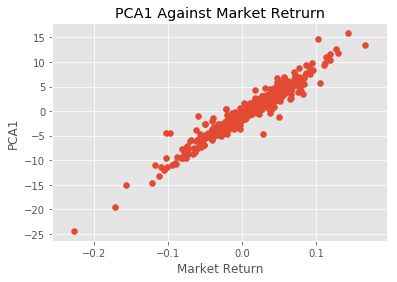

In [37]:
df2 = df_pca.join(ff['mktret'])
fig, ax = plt.subplots()
plt.scatter(df2.mktret, df2.PCA1)
plt.title('PCA1 Against Market Retrurn')
plt.xlabel('Market Return')
plt.ylabel('PCA1')
plt.show()

In [38]:
evec = pca.components_
mmp = []
for i in range(len(evec[0])):
    w = evec[0][i]/evec[0].sum()
    mmp.append(w)
w = pd.DataFrame(mmp, index=tb.columns)
w.columns=['Mimicking Portfolio Weight']
w = w.sort_values('Mimicking Portfolio Weight', ascending=False)
w

,Mimicking Portfolio Weight
Cnstr,0.038851
FabPr,0.037997
Whlsl,0.037807
Paper,0.037490
Fin,0.037376
ElcEq,0.037234
Chems,0.037165
Books,0.036974
Other,0.036841
Trans,0.036804
